In [1]:
# support vector machine for binary classification

# linear model:
# equation for middle decision boundary (line)
# w*x - b = 0
# (i = index)
# 2/||w|| = distance between support vectors (we want to maximise this (minimise ||w||))
# equation for upper support vector line
# w*xi - b >= 1
# equation for bottom support vector line
# w*xi - b <= -1
# therefore:
# yi(w*xi - b) >= 1


# cost function (using gradient descent):
# hinge loss:
# l = max(0, 1-yi(w*xi - b))


# regularization:
# if yi * f(x) >= 1:
#     Ji = lambda||w||**2
# else:
#    Ji = lambda||w||**2 + 1 - yi(w*xi - b)
#
# J = lambda||w||**2 + 1/n * sum(max(0, 1-yi(w*xi - b)))


# gradients
# (k = index)
# f(x) = w*x - b = 0
# if yi * f(x) >= 1:
#    derivative_weights = 2*lambda*weights_k
#    derivative_bias = 0
# else:
#    derivative_weight = 2*lambda*weights_k - yi * xi
#    derivative_bias = yi


# update rule
# for each training sample xi:
# (alpha = learning rate)
# weitghts = weights - alpha*derivative_weight
# bias = weights - alpha*derivative_bias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from data_generation import GenerateDatasets

dataset = GenerateDatasets()
dataset = dataset.make_blobs(nr_blobs=2,
                   nr_samples=1000,
                   nr_cols=2,
                   size_left=1,
                   mode=1.5,
                   size_right=2,
                   scale_row=1,
                   scale_col=1,
                   random_seed=True)
X, y = dataset

In [4]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X[:10], y[:10]

(array([[1.66167416, 1.75720506],
        [1.67732136, 1.27521238],
        [1.54403719, 1.64894507],
        [1.6509888 , 1.57458235],
        [1.62490189, 1.30529488],
        [1.6498026 , 1.83635684],
        [3.63745894, 1.65065124],
        [3.53045595, 1.38025632],
        [1.58286384, 1.34016479],
        [1.52174503, 1.33819788]]),
 array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0]))

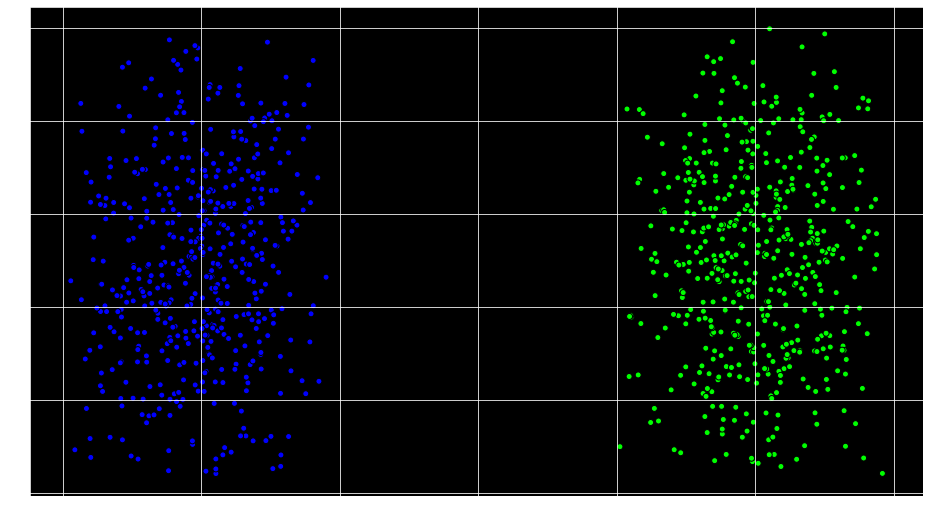

In [6]:
plt.style.use("dark_background")
plt.figure(figsize=(16, 9))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg", edgecolors="k")
plt.grid()
plt.show()

In [7]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.lambda_ = lambda_
        self.n_iters = n_iterations
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # svm can work only with 1 and -1 as class y labels, lets convert it
        y_ = np.where(y <= 0, -1, 1)
        n_samples, n_features = X.shape
        
        # init values of weights and bias with zeros
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent
        for _ in range(self.n_iters):
            for index, x_sample in enumerate(X):
                condition = y_[index] * (np.dot(x_sample, self.weights) - self.bias) >= 1
                if condition:
                    dw = 2*self.lambda_*self.weights
                    db = 0
                    self.weights -= self.lr*dw
                    self.bias -= self.lr*db
                else:
                    dw = 2*self.lambda_*self.weights - np.dot(x_sample, y_[index]) 
                    db = y_[index]
                    self.weights -= self.lr*dw
                    self.bias -= self.lr*db
                
    def predict(self, X):
        linear_output = np.dot(X, self.weights) - self.bias
        # np.sign function returns -1 if x < 0, 0 if x==0,
        #    1 if x > 0. nan is returned for nan inputs.
        minus_one_zero_plus_one = np.sign(linear_output)
        return np.where(minus_one_zero_plus_one>=0, 1, 0)

In [8]:
svm = SVM()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [9]:
# accuracy
sum((y_test==y_pred) / len(y_pred))

1.0000000000000007

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


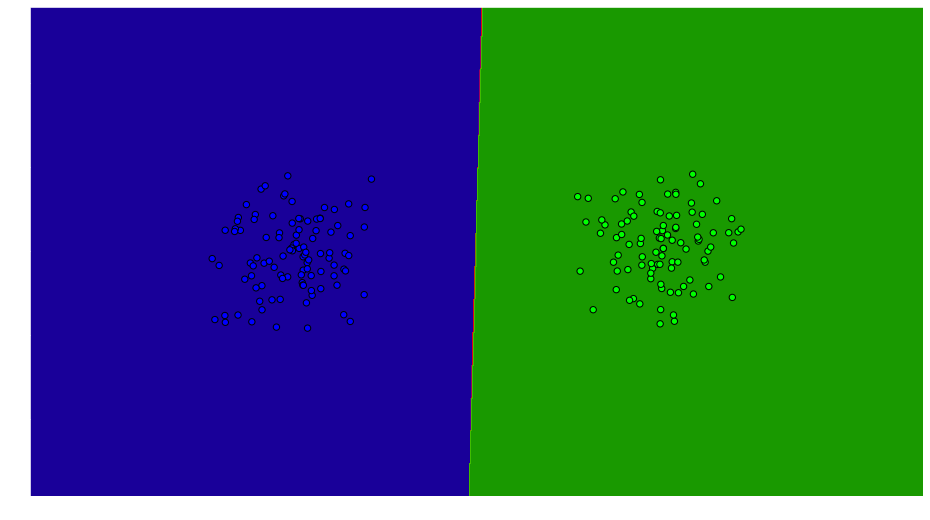

In [10]:
from data_plotting import Plots

plot = Plots()
plot.plot_decision_boundary(svm,
                           X_test,
                           y_test,
                           expand=1,
                           bound_smoot=1000,
                           fig_size=(16, 9),
                           grid=False,
                           verbose=False,
                           cmap="brg")